<a href="https://colab.research.google.com/github/SanthoshVanamala/DataAnalysis_NYC_Airbnb/blob/main/NYC_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize





#Load the data

In [8]:
listings = pd.read_csv("/content/listings.csv", on_bad_lines='skip',encoding="ISO-8859-1")


#Inspect the data

# **DATA CLEANING**

In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9630344,https://www.airbnb.com/rooms/9630344,20231001204715,2023-10-02,city scrape,Rental unit in Brooklyn Â· â 4.80 Â· 1 bedro...,Enjoy your own private bedroom in our 2 bedroo...,Easy access to subway. Trendy and yet quiet.,https://a0.muscache.com/pictures/496cf3f1-7d0d...,47783628,...,5.00,4.80,5.00,NaN,f,1,0,1,0,0.06
1,3533741,https://www.airbnb.com/rooms/3533741,20231001204715,2023-10-02,previous scrape,Rental unit in New York Â· 1 bedroom Â· 1 bed ...,Come stay in the heart of historic Hells Kitch...,NaN,https://a0.muscache.com/pictures/45157664/862a...,17791294,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,9731039,https://www.airbnb.com/rooms/9731039,20231001204715,2023-10-02,previous scrape,Rental unit in Queens Â· Studio Â· 1 bed Â· 1 ...,Studio Apartment in the heart of Sunnyside: of...,NaN,https://a0.muscache.com/pictures/81a96b92-d357...,50213378,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,21736164,https://www.airbnb.com/rooms/21736164,20231001204715,2023-10-02,previous scrape,Rental unit in Brooklyn Â· 1 bedroom Â· 1 bed ...,"Light-filled, high-ceilinged 1BR brownstone ap...","The neighborhood is vibrant, multicultural, an...",https://a0.muscache.com/pictures/4e3ee5e2-baa1...,4298654,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.03
4,22280002,https://www.airbnb.com/rooms/22280002,20231001204715,2023-10-01,city scrape,Rental unit in Brooklyn Â· â 4.98 Â· 1 bedroo...,This is a comfortable super spacious sunny 1 b...,Welcome to the enchanting neighborhood of Stuy...,https://a0.muscache.com/pictures/b187bce7-ded7...,67373899,...,4.91,4.94,4.92,NaN,f,1,1,0,0,1.26


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38792 non-null  int64  
 1   listing_url                                   38792 non-null  object 
 2   scrape_id                                     38792 non-null  int64  
 3   last_scraped                                  38792 non-null  object 
 4   source                                        38792 non-null  object 
 5   name                                          38792 non-null  object 
 6   description                                   38223 non-null  object 
 7   neighborhood_overview                         22556 non-null  object 
 8   picture_url                                   38792 non-null  object 
 9   host_id                                       38792 non-null 

In [11]:
columns_to_keep = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group_cleansed',
                   'neighbourhood', 'latitude', 'longitude', 'room_type',
                   'price', 'minimum_nights', 'number_of_reviews',
                   'last_review', 'reviews_per_month',
                   'calculated_host_listings_count']

listings = listings[columns_to_keep]

**# Handling Missing values**

#Drop rows with any missing values

In [12]:
from numpy.core.fromnumeric import mean
numeric_columns = listings.select_dtypes(include=[np.number]).columns
listings[numeric_columns] = listings[numeric_columns].fillna(listings[numeric_columns].mean())


<ipython-input-12-42b69cf2dd72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings[numeric_columns] = listings[numeric_columns].fillna(listings[numeric_columns].mean())


#Data Type Conversion

In [13]:
#Convert price to float
listings['price'] = listings['price'].astype(str).replace('\$','', regex = True).astype(str).replace(',','', regex=True).astype(float)

#Drop Duplicates

In [14]:
listings.drop_duplicates(inplace=True)


In [15]:
listings['price'] = winsorize(listings['price'], limits=[0, 0.05])

# **DATA ANALYSIS**

In [16]:
listings.shape

(38792, 15)

In [17]:
listings.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,3.879200e+04,3.879200e+04,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000,38792.000000
mean,2.820216e+17,1.558350e+08,40.729379,-73.945829,178.896319,30.639977,25.356285,1.078758,38.581563
std,3.854980e+17,1.676485e+08,0.056725,0.055115,141.800082,26.633260,55.852480,1.414338,113.306079
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000
25%,1.976673e+07,1.643725e+07,40.688790,-73.982820,79.000000,30.000000,0.000000,0.190000,1.000000
50%,4.542122e+07,7.616643e+07,40.726290,-73.953886,135.000000,30.000000,4.000000,1.040000,1.000000
75%,7.208503e+17,2.754027e+08,40.762672,-73.926209,225.000000,30.000000,24.000000,1.078758,6.000000
max,9.927295e+17,5.395985e+08,40.911380,-73.713650,586.000000,1250.000000,1843.000000,62.820000,602.000000


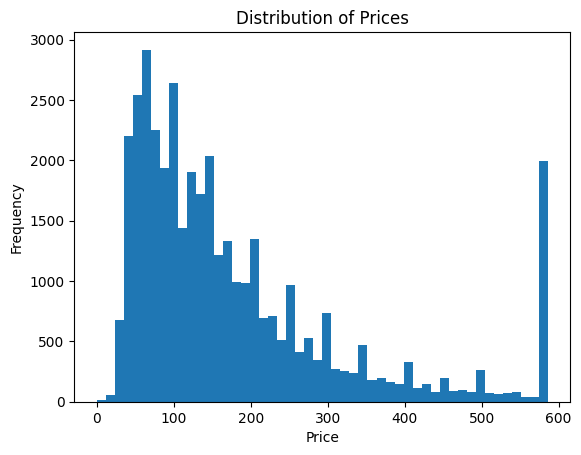

In [18]:
plt.hist(listings['price'], bins = 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

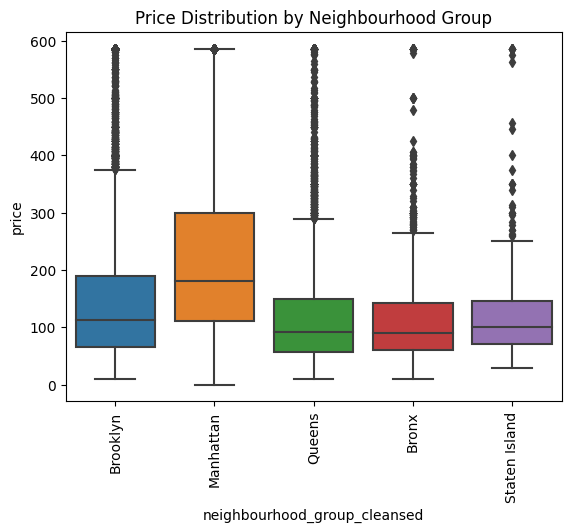

In [19]:
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data = listings)
plt.xticks(rotation = 90)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

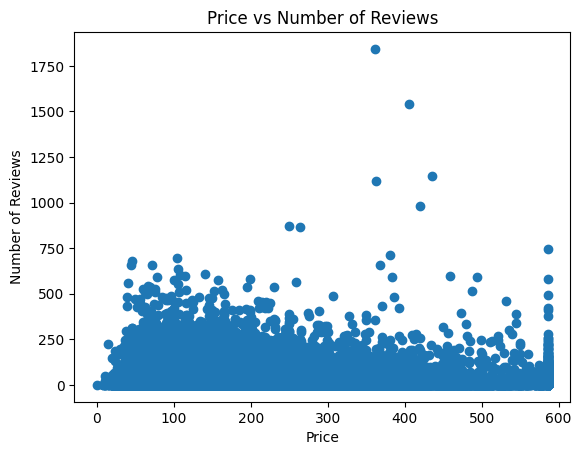

In [25]:
plt.scatter(listings['price'],listings['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs Number of Reviews')
plt.show()

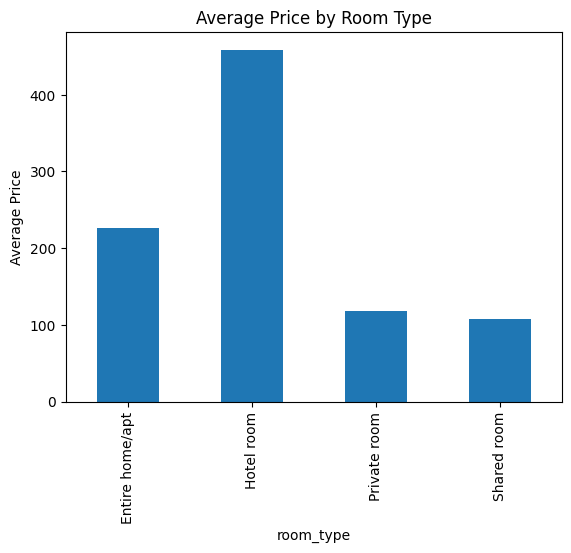

In [21]:
avg_prices = listings.groupby('room_type')['price'].mean()
avg_prices.plot(kind ='bar')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

<Axes: >

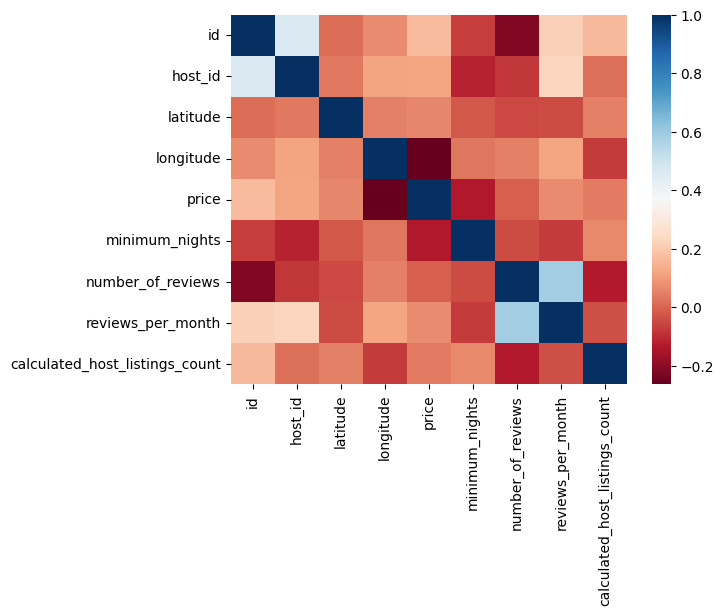

In [22]:
numeric_columns = listings.select_dtypes(include=[np.number]).columns
corr = listings[numeric_columns].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')

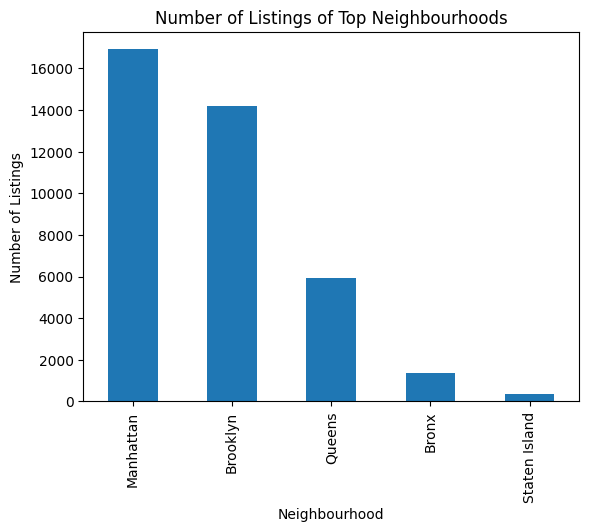

In [23]:
top_neighbourhoods = listings['neighbourhood_group_cleansed'].value_counts()
# Plot the number of listings in these neighbourhoods
top_neighbourhoods.plot(kind='bar')
plt.title('Number of Listings of Top Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.show()
